<a href="https://colab.research.google.com/github/Naveenreddy2711999/Balancing-the-Imbalance-SMOTE-vs.-ADASYN-in-IoT-Machine-Learning-Applications/blob/main/Smote_vs_adasyn_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os

path = "/content/drive/My Drive/bot iot data set"

print("Trying dataset folder:", path)
exists = os.path.isdir(path)
print("Folder exists?", exists)
if exists:
    files = sorted([f for f in os.listdir(path) if f.endswith('.csv')])
    print("CSV count:", len(files))
    print("First 10 CSV files:", files[:10])
else:
    print("Folder not found")


Trying dataset folder: /content/drive/My Drive/bot iot data set
Folder exists? True
CSV count: 75
First 10 CSV files: ['data_1.csv', 'data_10.csv', 'data_11.csv', 'data_12.csv', 'data_13.csv', 'data_14.csv', 'data_15.csv', 'data_16.csv', 'data_17.csv', 'data_18.csv']


In [5]:
import pandas as pd
from tqdm import tqdm
import os

data_dir = "/content/drive/My Drive/bot iot data set"
output_path = "/content/drive/My Drive/bot_iot_merged.csv"

files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')])

print(f"Found {len(files)} CSV files. Merging incrementally...")
first = True

for f in tqdm(files, desc="Merging CSVs"):
    df = pd.read_csv(f)
    if df.empty:
        continue
    df["source_file"] = os.path.basename(f)
    df.to_csv(output_path, mode='w' if first else 'a', index=False, header=first)
    first = False

print("✅ Merged successfully:", output_path)


Found 75 CSV files. Merging incrementally...


Merging CSVs:   0%|          | 0/75 [00:00<?, ?it/s]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:   8%|▊         | 6/75 [08:02<1:01:43, 53.67s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:   9%|▉         | 7/75 [08:52<59:17, 52.32s/it]  /tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:  11%|█         | 8/75 [09:33<54:32, 48.84s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:  12%|█▏        | 9/75 [10:17<52:05, 47.36s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (

✅ Merged successfully: /content/drive/My Drive/bot_iot_merged.csv


In [6]:
!ls -lh "/content/drive/My Drive/bot_iot_merged.csv"


-rw------- 1 root root 15G Nov  6 05:12 '/content/drive/My Drive/bot_iot_merged.csv'


In [7]:
import pandas as pd

file_path = "/content/drive/My Drive/bot_iot_merged.csv"

df_sample = pd.read_csv(file_path, nrows=1000000)

df_sample.head(), df_sample.info()


/tmp/ipython-input-599856057.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv(file_path, nrows=1000000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   pkSeqID       1000000 non-null  int64  
 1   stime         1000000 non-null  float64
 2   flgs          1000000 non-null  object 
 3   proto         1000000 non-null  object 
 4   saddr         1000000 non-null  object 
 5   sport         999513 non-null   object 
 6   daddr         1000000 non-null  object 
 7   dport         999513 non-null   object 
 8   pkts          1000000 non-null  int64  
 9   bytes         1000000 non-null  int64  
 10  state         1000000 non-null  object 
 11  ltime         1000000 non-null  float64
 12  seq           1000000 non-null  int64  
 13  dur           1000000 non-null  float64
 14  mean          1000000 non-null  float64
 15  stddev        1000000 non-null  float64
 16  smac          0 non-null        float64
 17  dmac          0 non-null    

(   pkSeqID         stime flgs proto            saddr  sport           daddr  \
 0        1  1.526344e+09    e   arp    192.168.100.1    NaN   192.168.100.3   
 1        2  1.526344e+09    e   tcp    192.168.100.7    139   192.168.100.4   
 2        3  1.526344e+09    e   udp  192.168.100.149  51838  27.124.125.250   
 3        4  1.526344e+09    e   arp    192.168.100.4    NaN   192.168.100.7   
 4        5  1.526344e+09    e   udp   192.168.100.27  58999   192.168.100.1   
 
    dport  pkts  bytes  ... dpkts  sbytes  dbytes       rate     srate  \
 0    NaN     4    240  ...     2     120     120   0.002508  0.000836   
 1  36390    10    680  ...     5     350     330   0.006190  0.002751   
 2    123     2    180  ...     1      90      90  20.590960  0.000000   
 3    NaN    10    510  ...     5     210     300   0.006189  0.002751   
 4     53     4    630  ...     2     174     456   0.005264  0.001755   
 
       drate  attack  category  subcategory   source_file  
 0  0.000836

In [9]:
import pandas as pd

file_path = "/content/drive/My Drive/bot_iot_merged.csv"

# Read only useful columns in chunks (memory-efficient)
use_cols = [
    'pkts','bytes','state','dur','mean','stddev','sum','min','max',
    'spkts','dpkts','sbytes','dbytes','rate','srate','drate',
    'proto','attack'
]

chunk_list = []

for chunk in pd.read_csv(file_path, usecols=use_cols, chunksize=1000000, low_memory=False):
    chunk_list.append(chunk.sample(frac=0.05))  # Take 5% sample to reduce RAM load

df = pd.concat(chunk_list, ignore_index=True)

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   proto   object 
 1   pkts    int64  
 2   bytes   int64  
 3   state   object 
 4   dur     float64
 5   mean    float64
 6   stddev  float64
 7   sum     float64
 8   min     float64
 9   max     float64
 10  spkts   int64  
 11  dpkts   int64  
 12  sbytes  int64  
 13  dbytes  int64  
 14  rate    float64
 15  srate   float64
 16  drate   float64
 17  attack  int64  
dtypes: float64(9), int64(7), object(2)
memory usage: 503.8+ MB


(  proto  pkts  bytes state       dur      mean  stddev       sum       min  \
 0   tcp     2    120   RST  0.042178  0.042178     0.0  0.042178  0.042178   
 1   tcp     2    120   RST  0.000069  0.000069     0.0  0.000069  0.000069   
 2   tcp     2    120   RST  0.000684  0.000684     0.0  0.000684  0.000684   
 3   tcp     2    120   RST  0.030438  0.030438     0.0  0.030438  0.030438   
 4   tcp     2    120   RST  0.046687  0.046687     0.0  0.046687  0.046687   
 
         max  spkts  dpkts  sbytes  dbytes          rate  srate  drate  attack  
 0  0.042178      1      1      60      60     23.709042    0.0    0.0       1  
 1  0.000069      1      1      60      60  14492.752930    0.0    0.0       1  
 2  0.000684      1      1      60      60   1461.988281    0.0    0.0       1  
 3  0.030438      1      1      60      60     32.853668    0.0    0.0       1  
 4  0.046687      1      1      60      60     21.419239    0.0    0.0       1  ,
 None)

**Convert Object Columns to Categorical**

In [10]:
import pandas as pd
# Convert object → category to reduce memory usage
df['proto'] = df['proto'].astype('category')
df['state'] = df['state'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 18 columns):
 #   Column  Dtype   
---  ------  -----   
 0   proto   category
 1   pkts    int64   
 2   bytes   int64   
 3   state   category
 4   dur     float64 
 5   mean    float64 
 6   stddev  float64 
 7   sum     float64 
 8   min     float64 
 9   max     float64 
 10  spkts   int64   
 11  dpkts   int64   
 12  sbytes  int64   
 13  dbytes  int64   
 14  rate    float64 
 15  srate   float64 
 16  drate   float64 
 17  attack  int64   
dtypes: category(2), float64(9), int64(7)
memory usage: 454.8 MB


**Encode Categorical Columns(because smote needs the numerical values)**

In [11]:
from sklearn.preprocessing import LabelEncoder

le_proto = LabelEncoder()
le_state = LabelEncoder()

df['proto'] = le_proto.fit_transform(df['proto'])
df['state'] = le_state.fit_transform(df['state'])


**Separate Attack & Normal**

In [12]:
from sklearn.utils import resample

# Separate minority and majority classes
df_attack = df[df['attack'] == 1]
df_normal = df[df['attack'] == 0]

print("Attack:", len(df_attack))
print("Normal:", len(df_normal))


Attack: 3668063
Normal: 459


In [13]:
# Downsample Attack Class to 50,000
df_attack_down = resample(df_attack,
                          replace=False,   # no duplicate rows
                          n_samples=50000,
                          random_state=42)

print("After downsampling:")
print("Attack:", len(df_attack_down))
print("Normal:", len(df_normal))


After downsampling:
Attack: 50000
Normal: 459


**Merge Normal + Downsampled Attack**

In [14]:
df_small = pd.concat([df_attack_down, df_normal], axis=0).reset_index(drop=True)

print("Combined Data Size:", df_small.shape)
df_small['attack'].value_counts()


Combined Data Size: (50459, 18)


,count
attack,
1,50000
0,459


**Convert Categorical Columns to Numeric**

In [15]:
import pandas as pd

df_small['proto'] = df_small['proto'].astype('category')
df_small['state'] = df_small['state'].astype('category')

df_small['proto'] = df_small['proto'].cat.codes
df_small['state'] = df_small['state'].cat.codes


**Apply SMOTE to Balance Both Classes**

In [16]:
from imblearn.over_sampling import SMOTE

X = df_small.drop('attack', axis=1)
y = df_small['attack']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:")
y_res.value_counts()


After SMOTE:


,count
attack,
1,50000
0,50000


**Train-Test Split**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print(X_train.shape, X_test.shape)


(70000, 17) (30000, 17)


**Import Evaluation Functions**

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Logistic Regression**

In [21]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Assume your original training data is X_train, y_train
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train_smote_scaled, y_train_smote)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15000
           1       1.00      0.94      0.97     15000

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



`**Decision Tree**`

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



**SVM**

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf')
svm.fit(X_train_smote_scaled, y_train_smote)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:\n")
print(classification_report(y_test, y_pred_svm))


SVM Results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15000
           1       1.00      0.95      0.97     15000

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



**ADASYN Oversampling**

In [25]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("Before ADASYN:", y.value_counts())
print("After ADASYN :", y_adasyn.value_counts())


Before ADASYN: attack
1    50000
0      459
Name: count, dtype: int64
After ADASYN : attack
0    50001
1    50000
Name: count, dtype: int64


**Split the ADASYN Data**

In [26]:
from sklearn.model_selection import train_test_split

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_adasyn, y_adasyn, test_size=0.3, random_state=42, stratify=y_adasyn
)


**Logistic Regression (ADASYN)**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_ada = LogisticRegression(max_iter=2000)
lr_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_lr_ada = lr_ada.predict(X_test_adasyn)

print("Logistic Regression (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_lr_ada))
print(classification_report(y_test_adasyn, y_pred_lr_ada))


Logistic Regression (ADASYN) Accuracy: 0.9414686177127429
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15001
           1       0.97      0.92      0.94     15000

    accuracy                           0.94     30001
   macro avg       0.94      0.94      0.94     30001
weighted avg       0.94      0.94      0.94     30001



***Decision Tree (ADASYN)***

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_ada = DecisionTreeClassifier(random_state=42)
dt_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_dt_ada = dt_ada.predict(X_test_adasyn)

print("Decision Tree (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_dt_ada))
print(classification_report(y_test_adasyn, y_pred_dt_ada))


Decision Tree (ADASYN) Accuracy: 0.9921669277690743
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15001
           1       0.98      1.00      0.99     15000

    accuracy                           0.99     30001
   macro avg       0.99      0.99      0.99     30001
weighted avg       0.99      0.99      0.99     30001



***Random Forest (ADASYN)***

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_ada = RandomForestClassifier(random_state=42)
rf_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_rf_ada = rf_ada.predict(X_test_adasyn)

print("Random Forest (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_rf_ada))
print(classification_report(y_test_adasyn, y_pred_rf_ada))


Random Forest (ADASYN) Accuracy: 0.9923335888803707
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15001
           1       0.99      1.00      0.99     15000

    accuracy                           0.99     30001
   macro avg       0.99      0.99      0.99     30001
weighted avg       0.99      0.99      0.99     30001



***SVM (ADASYN)***

In [32]:
from sklearn.svm import LinearSVC

svm_ada = LinearSVC(max_iter=3000)
svm_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_svm_ada = svm_ada.predict(X_test_adasyn)

print(" SVM (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_svm_ada))
print(classification_report(y_test_adasyn, y_pred_svm_ada))


 SVM (ADASYN) Accuracy: 0.9009049547522624
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     10001
           1       0.88      0.93      0.90     10000

    accuracy                           0.90     20001
   macro avg       0.90      0.90      0.90     20001
weighted avg       0.90      0.90      0.90     20001



***Plot Comparison Graphs (Bar Chart)***

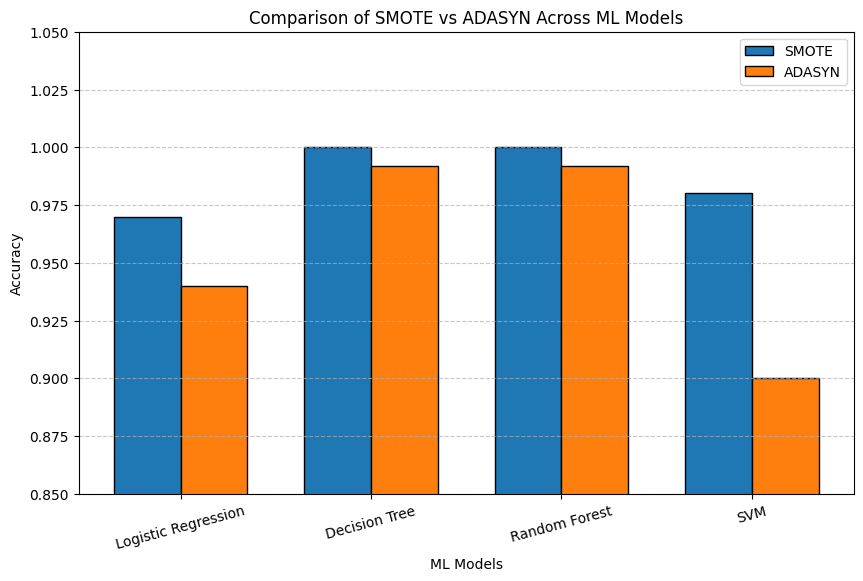

In [33]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
smote_acc = [0.97, 1.00, 1.00, 0.98]
adasyn_acc = [0.94, 0.992, 0.992, 0.90]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, smote_acc, width, label='SMOTE', edgecolor='black')
plt.bar(x + width/2, adasyn_acc, width, label='ADASYN', edgecolor='black')

plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison of SMOTE vs ADASYN Across ML Models')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.ylim(0.85, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
